# 制御対象の振る舞いについて

以下の伝達関数をもつシステムの振る舞いについて調べてみる ([2]の３章演習問題の問7を参照)。

$$
\frac{2s + 10}{(s+1)(s+2)(s+3)}
$$

In [1]:
import numpy as np
from control.matlab import *
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
P1 = tf([2, 10], [0, 1])
P2 = tf([0, 1], [1, 1])
P3 = tf([0, 1], [1, 2])
P4 = tf([0, 1], [1, 3])
P = P1 * P2 * P3 * P4

In [3]:
print(P)


       2 s + 10
----------------------
s^3 + 6 s^2 + 11 s + 6



## 安定性

In [4]:
print('Poles of P:', pole(P))

Poles of P: [-3. -2. -1.]


## ステップ応答

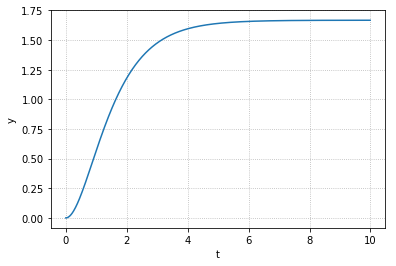

In [5]:
y, t = step(P, np.arange(0, 10, 0.01))

fig, ax = plt.subplots()
ax.plot(t, y)
ax.set_xlabel('t')
ax.set_ylabel('y')
ax.grid(ls=':')

## 正弦波入力したときの応答

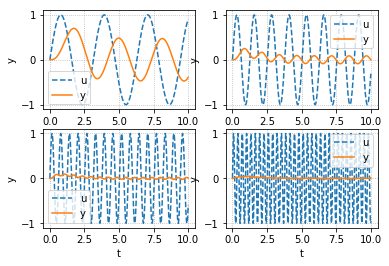

In [6]:
freq = [2, 5, 10, 20]
Td = np.arange(0, 10, 0.01)

fig, ax = plt.subplots(2, 2)

for i in range(2):
    for j in range(2):
        u = np.sin(freq[2*i+j] * Td)
        y, t, x0 = lsim(P, u, Td, 0)
        
        ax[i, j].plot(t, u, ls='--', label='u')
        ax[i, j].plot(t, y, label='y')
        ax[i, j].set_xlabel('t')
        ax[i, j].set_ylabel('y')
        ax[i, j].grid(ls=':')
        ax[i, j].legend(loc='best')

ax[0, 0].legend()

## ボード線図

Text(0, 0.5, 'Phase [deg]')

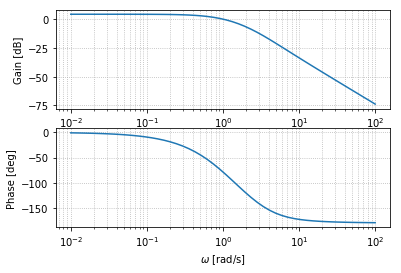

In [7]:
fig, ax = plt.subplots(2, 1)
gain, phase, w = bode(P, logspace(-2, 2), Plot=False)

ax[0].semilogx(w, 20*np.log10(gain))
ax[1].semilogx(w, phase*180/np.pi)

ax[0].grid(which='both', ls=':')
ax[0].set_ylabel('Gain [dB]')

ax[1].grid(which='both', ls=':')
ax[1].set_xlabel('$\omega$ [rad/s]')
ax[1].set_ylabel('Phase [deg]')

## ナイキスト線図

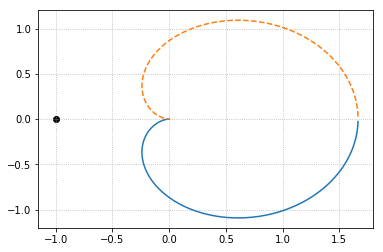

In [8]:
fig, ax = plt.subplots()
x, y, w = nyquist(P, logspace(-2, 3, 1000), Plot=False)
ax.plot(x, y)
ax.plot(x, -y, '--')
ax.scatter(-1, 0, color='k')
ax.grid(ls=':')

## 根軌跡

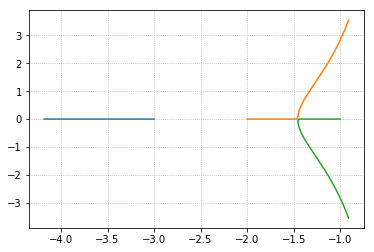

In [12]:
fig, ax = plt.subplots()
rlist, klist = rlocus(P, np.arange(0, 5, 0.001), Plot=False)
ax.plot(rlist.real, rlist.imag)
ax.grid(ls=':')

## 参考文献
[1] 南裕樹 (2019) 『Pythonによる制御工学入門』 オーム社  
[2] 杉江俊治・藤田政之 (1999) 『フィードバック制御入門』 コロナ社